In [11]:
import numpy
import random
import matplotlib.pyplot as pl

In [4]:
class Hnn:
    def __init__(self, in_dim, max_iter):
        print('create hnn(%d, %d)' % (in_dim, max_iter))
        self.in_dim = in_dim 
        self.max_iter = max_iter

        self.cache = []
        self.width = in_dim ** 2

        self.weights = numpy.zeros((self.width, self.width), dtype=numpy.float32)
    
    def tr(self, i): 
        return i // self.in_dim, i % self.in_dim

    def chk(self, dat):
        for cached in self.cache:
            if numpy.array_equal(cached, dat):
                return True
        return False

    def fit(self, inp):
        self.cache.append(inp)
        for i in range(self.width):
            for j in range(self.width):
                if i != j:
                    x, y = self.tr(i)
                    m, n = self.tr(j)

                    self.weights[i, j] += inp[x, y] * inp[m, n]
                else:
                    self.weights[i, j] = 0 

    def pred(self, inp):
        total_iter, mis_iter, outp = 0, 0, inp.copy()
        while not self.chk(outp):
            total_iter += 1
            cur_idx = random.randint(0, self.width - 1)
            predw = 0 
            for i in range(self.width):
                x, y = self.tr(i)
                predw += outp[x, y] * self.weights[i, cur_idx]

            predw = 1 if predw > 0 else -1
            x, y = self.tr(cur_idx)
            if predw != outp[x, y]: 
                outp[x, y] = predw
            mis_iter = 0 if predw != outp[x, y] else mis_iter + 1 

            if mis_iter >= self.max_iter:
                return False, outp, total_iter
        return True, outp, total_iter


In [18]:
def normalize(image_matrix: numpy.ndarray):
    return numpy.where(image_matrix == 0, -1, image_matrix)

def noise_trafaret(source_imgage: numpy.ndarray, noise_level: float):
    new_image_matrix = source_imgage.copy()

    random_indices = random.sample(range(0, new_image_matrix.size), int(noise_level * new_image_matrix.size))
    for i in random_indices:
        y = int(i / source_imgage.shape[0])
        x = i % source_imgage.shape[0]
        new_image_matrix[y][x] = -new_image_matrix[y][x]
    return new_image_matrix

def add_noise_and_recognize(source_imgage: numpy.ndarray, net: Hnn, num_of_image):
    noised_shapes = []
    for i in range(20):
        noise_level = i * 5 / 100
        noised_shapes.append(noise_trafaret(source_imgage, noise_level))

    for i in range(len(noised_shapes)):
        recognized, adjusted_shape, iterations = net.pred(noised_shapes[i])
        print(recognized, iterations)
        pl.imshow(adjusted_shape)
        pl.imshow(noised_shapes[i])

In [14]:
img1 = numpy.array([
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
])

img2 = numpy.array([
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 1, 1, 1, 0, 1, 1],
    [1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
])
img3 = numpy.array([
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
])

create hnn(10, 1200)
True 0
True 227
True 239
True 227
True 425
True 324
True 324
False 1200
True 552
False 1200
False 1200
False 1200
False 1200
False 1200
False 1200
False 1200
False 1200
False 1200
False 1200
False 1200
True 0
True 69
True 341
True 252
True 295
True 370
True 416
True 263
True 473
True 515
True 423
False 1200
False 1200
False 1200
False 1200
False 1200
False 1200
False 1200
False 1200
False 1200
True 0
True 154
True 246
True 387
True 234
True 324
True 397
False 1200
True 397
True 305
False 1200
False 1200
False 1200
False 1200
False 1200
False 1200
False 1200
False 1200
False 1200
False 1200


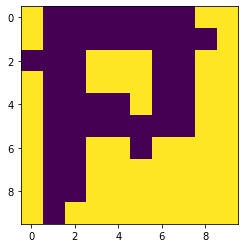

In [19]:
img1 = normalize(img1)
img2 = normalize(img2)
img3 = normalize(img3)

net = Hnn(10, 1200)

net.fit(img1)
net.fit(img2)
net.fit(img3)
pl.subplots()

add_noise_and_recognize(img1, net, "А")
add_noise_and_recognize(img2, net, "И")
add_noise_and_recognize(img3, net, "Р")